# Stetig vs. diskret

Hier soll diskutiert werden bei welchem Typ der Daten welche Maßzahl und Darstellungsmethode sinnvoll ist.
Dazu soll uns insbesondere der Unterschied zwischen stetigen und diskreten Merkmalen interessieren.
Um dies gut zu veranschaulichen werden wir je Datensatz wählen und anhand dessen die verschiedenen Darstellungen und Maßzahlen diskutieren.

## Ein diskretes Merkmal mit 3 Ausprägungen

Wir nutzen einen der Build-In-Datensätze in R, den Datensatz `mtcars` und hier speziell die Spalte `cyl`. Der Datensatz enthält Daten zu 32 Autos. In der Spalte `cyl` steht die Anzahl der Zylinder des jeweiligen Fahrzeugs.

Wir speichern den Vektor unter $x$ und berechnen ein paar Maßzahlen

In [1]:
x <- mtcars$cyl

cat("Der komplette Datensatz:")
sort(x)

cat("arthmetisches Mittel: ", mean(x), "\n");

cat("Standardabweichung: ", sd(x), "\n")

cat("Varianz: ", var(x), "\n")

cat("Median: ", median(x), "\n")

cat("Interquartilsabstand: ", quantile(x,0.75)-quantile(x,0.25), "\n\n")


Der komplette Datensatz:

[1] 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8

arthmetisches Mittel:  6.1875 
Standardabweichung:  1.785922 
Varianz:  3.189516 
Median:  6 
Interquartilsabstand:  4 



Nun schauen wir uns die Häufigkeitstabelle und noch ein paar Visualisierungen an. Hier bietet sich zum Beispiel ein Säulendiagramm und Kreisdiagramm an. Auch die empirsche Verteilungsfunktion ist sehr aussagekräftig. Alle drei Grafiken visualiesieren die Verteilung gut.

Häufigkeitstabelle:

x
 4  6  8 
11  7 14 

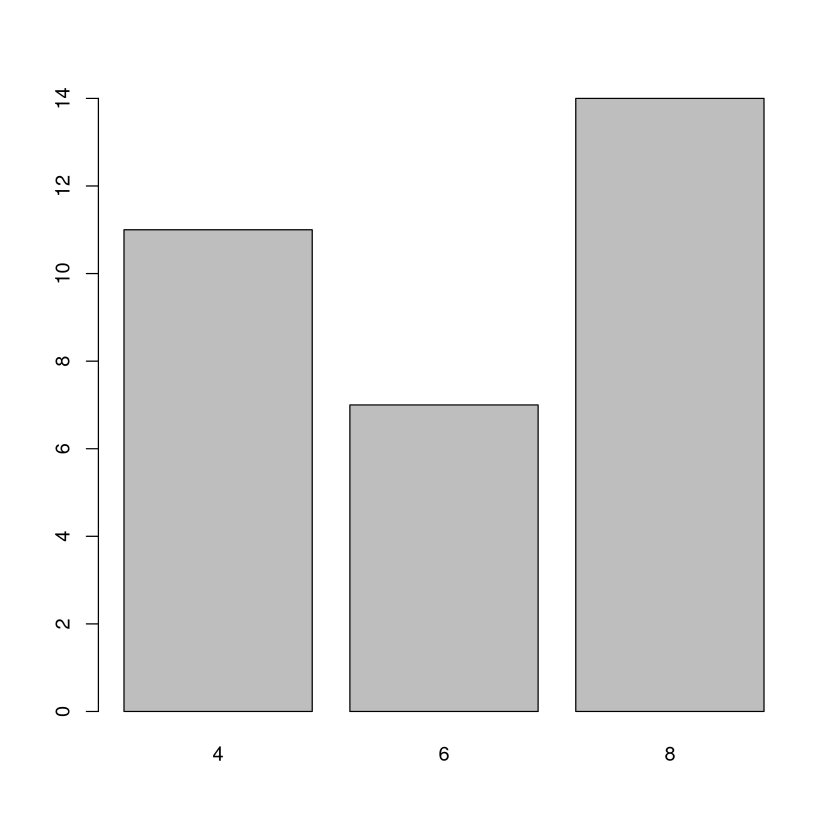

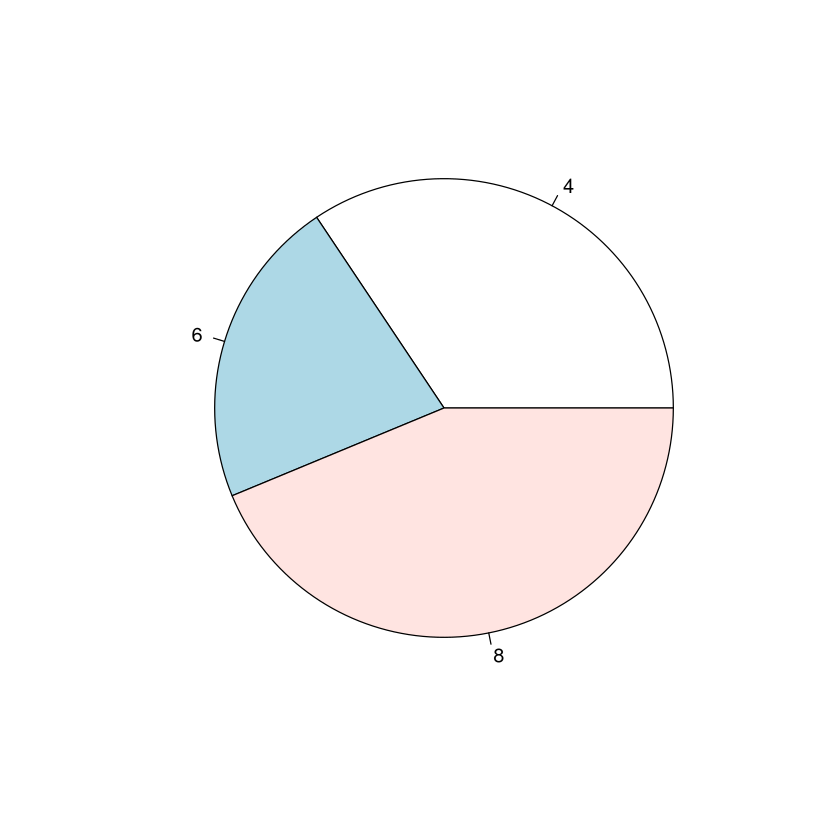

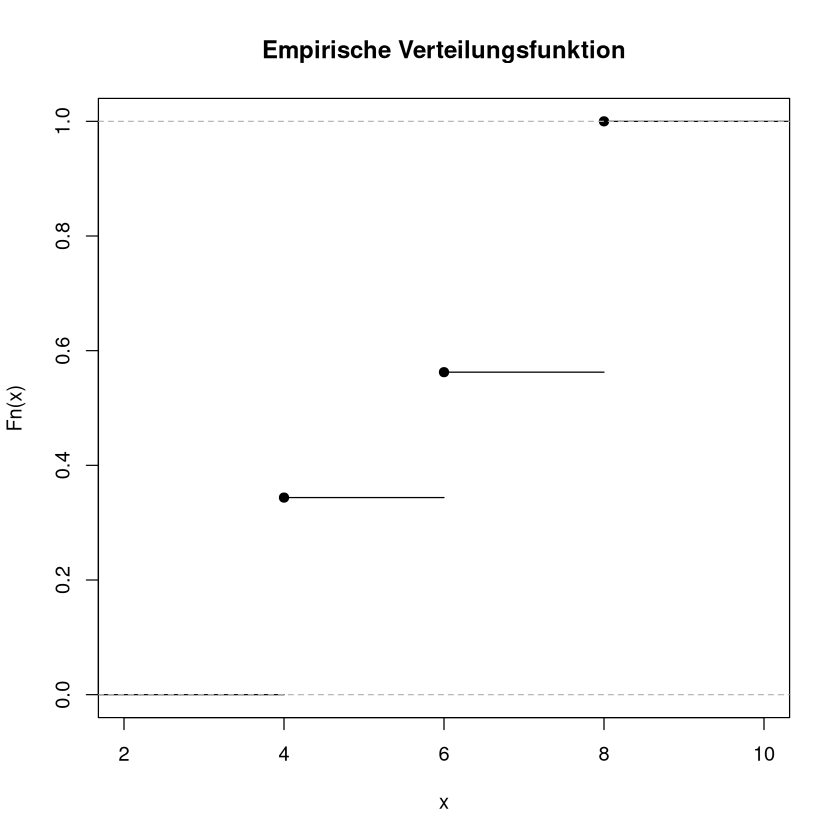

In [2]:

cat("Häufigkeitstabelle:")
table(x)

barplot(table(x))

pie(table(x))

plot(ecdf(x), main="Empirische Verteilungsfunktion")

Nun folgen noch ein paar Negativ-Beispiele, also Grafiken, die man zwar erstellen kann, die aber in dieser Situation nicht besonders günstig sind:

1. **Histogramm:** Da es nur drei verschiedene Werte gibt werden auch drei Säulen dargestellt. Die Höhen entsprechen den absoluten Häufigkeiten. Allerdings ist die Position der Säulen auf der x-Achse nicht optimal. Bei dieser Darstellung muss man überlegen: Wie kann das gemeint sein, dass die Säule von 7.5 bis 8 auf der x-Achse reicht? Deutlich besser und eindeutiger ist da, das Säulendiagramm von oben.

2. **Boxplot:** Im Boxplot sehen wir nur die Box, keine Whiskers (Antennen), siehe [](section:quantile). Das liegt daran, dass es nur 3 Werte gibt. Visualisiert werden also nur die Quantile $q_{0.25}$, $q_{0.5}$ und $q_{0.75}$.

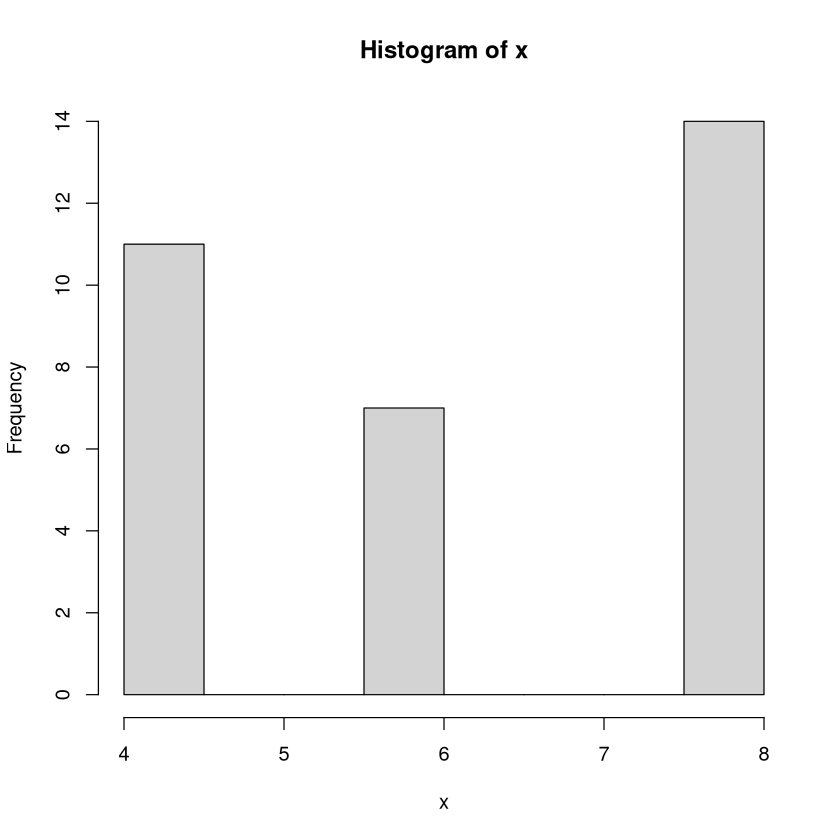

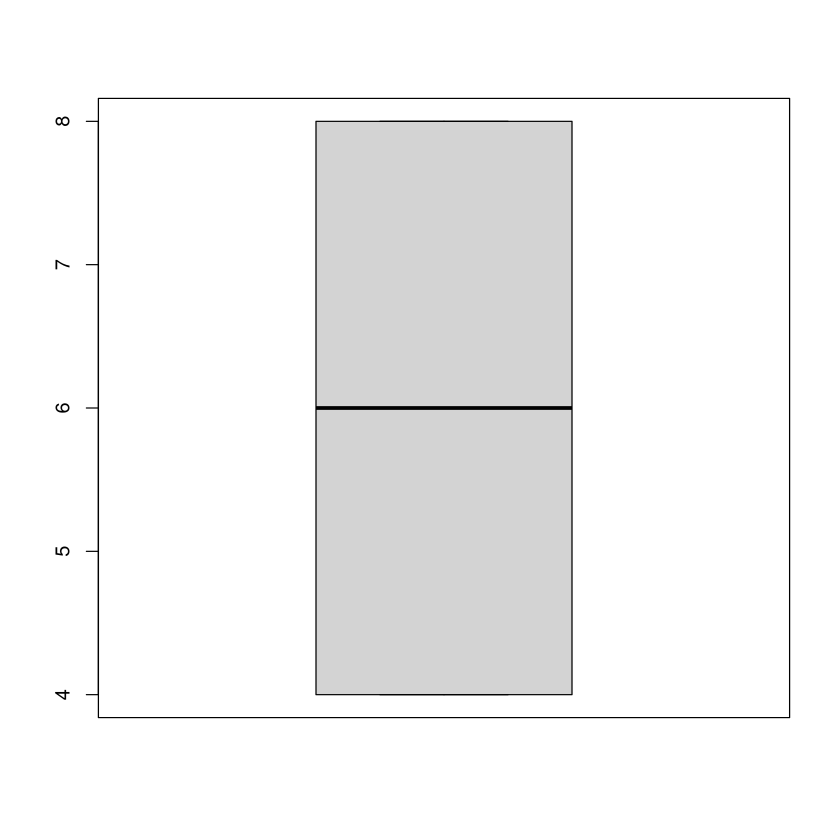

In [3]:
hist(x)

boxplot(x)

## Ein diskretes Merkmal mit 13 Ausprägungen

In dem Datensatz `discoveries` wurde für 100 Jahre aufgelistet wieviele wichtige Entdeckungen pro Jahr gemacht wurden. Wir schauen uns zunächst den gesamten Datensatz, die Häufigkeitstabelle und ein paar Maßzahlen an.

In [4]:
sort(discoveries)

table(discoveries)


cat("arthmetisches Mittel: ", mean(discoveries), "\n\n");

cat("Standardabweichung: ", sd(discoveries), "\n\n")

cat("Varianz: ", var(discoveries), "\n\n")

cat("Median: ", median(discoveries), "\n\n")

cat("Interquartilsabstand: ", quantile(discoveries,0.75)-quantile(discoveries,0.25), "\n\n")

cat("Spannweite: ", max(discoveries)-min(discoveries), "\n\n")

cat("summary() liefert:")
summary(discoveries)

[1]  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2
 [26]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3
 [51]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
 [76]  4  4  4  4  5  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  8  9 10 12

discoveries
 0  1  2  3  4  5  6  7  8  9 10 12 
 9 12 26 20 12  7  6  4  1  1  1  1 

arthmetisches Mittel:  3.1 

Standardabweichung:  2.254065 

Varianz:  5.080808 

Median:  3 

Interquartilsabstand:  2 

Spannweite:  12 

summary() liefert:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     2.0     3.0     3.1     4.0    12.0 

Nun folgen ein paar Grafiken: Kreisdiagramm, Säulendiagramm, Histogramm, empirische Verteilungsfunktion und Boxplot

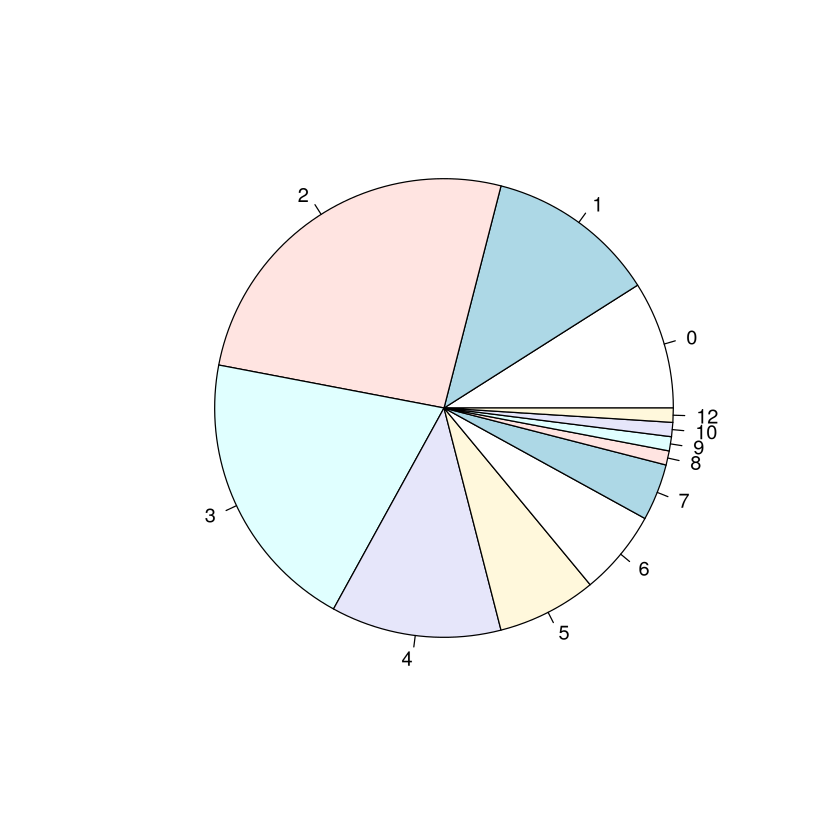

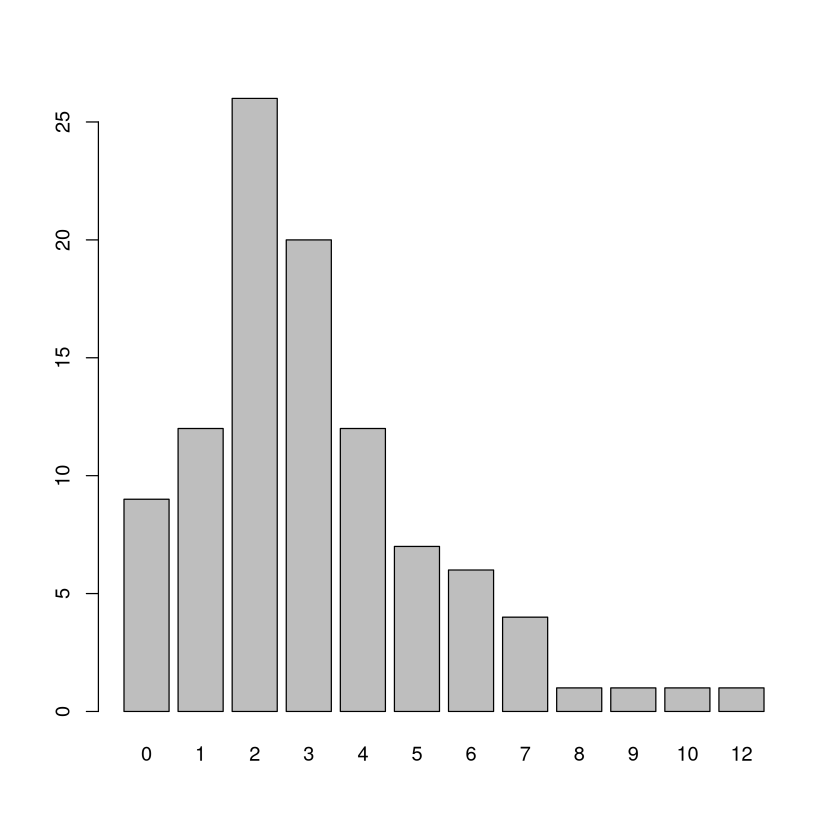

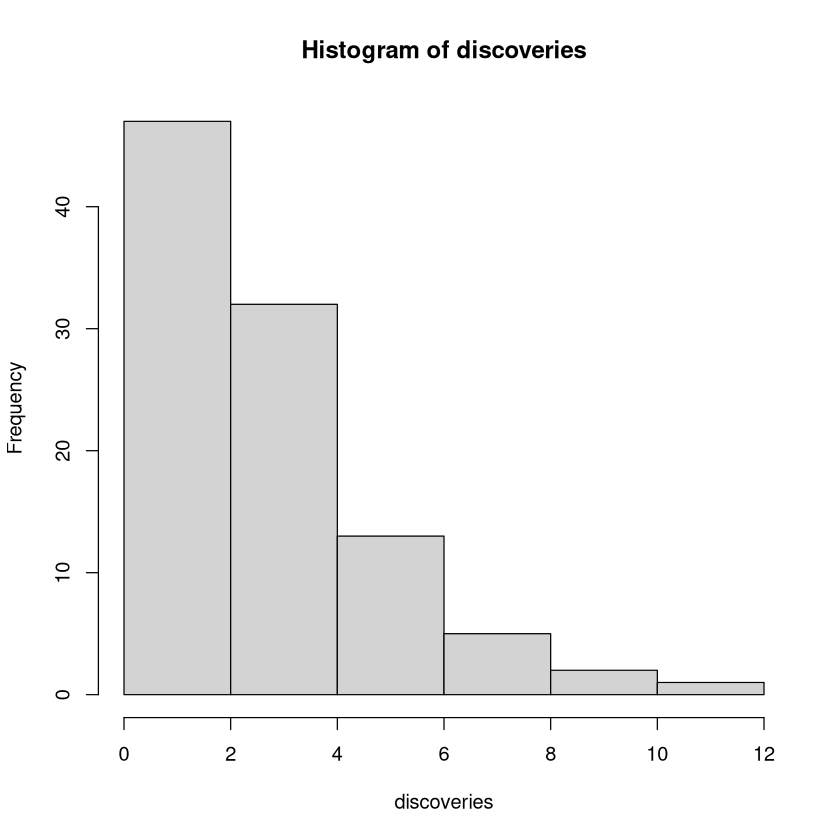

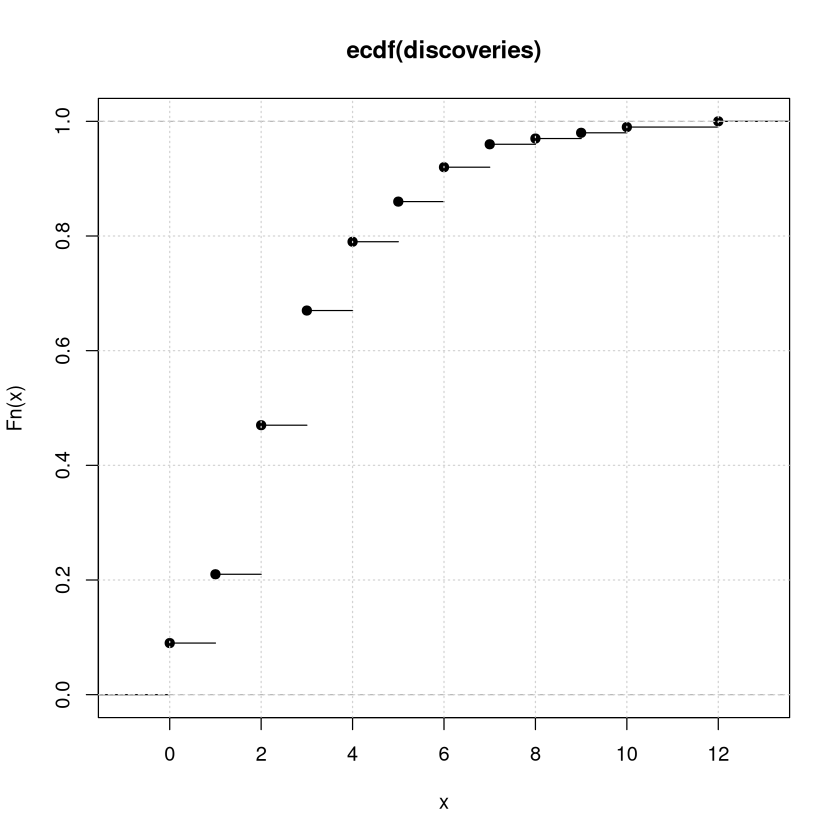

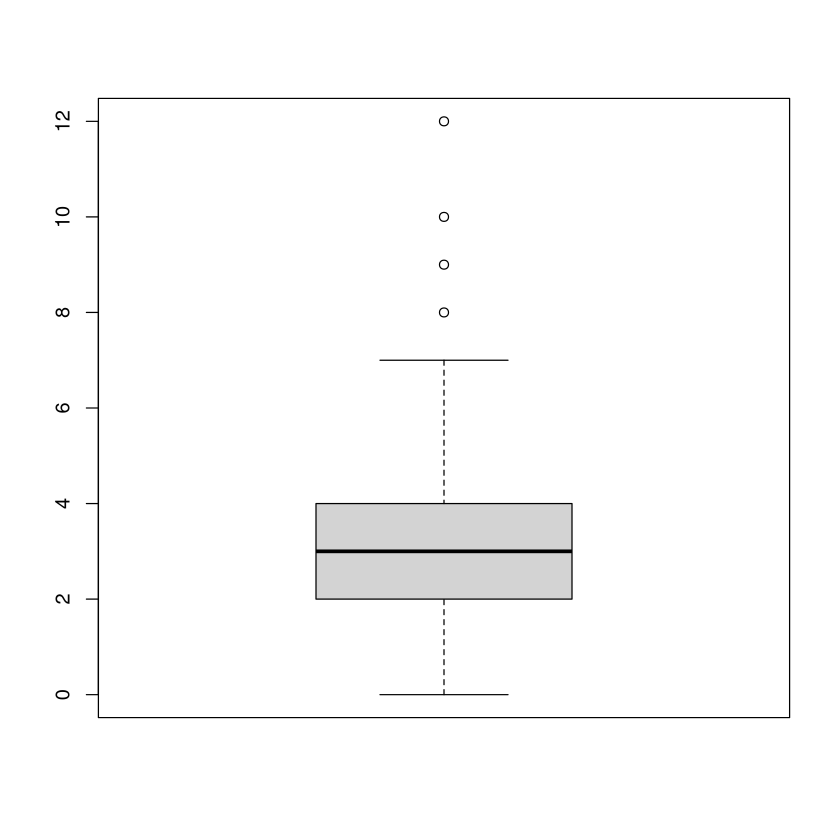

In [5]:
pie(table(discoveries))

barplot(table(discoveries))

hist(discoveries)

plot(ecdf(discoveries))
grid()

boxplot(discoveries)

Alle 5 Grafiken sind aussagekräftig Visualisierungen der Daten. Beim genaueren Hinsehen fällt allerdings auf, dass die "Form" des Histogramm von der des Säulendiagramms abweicht. Das liegt an der "Entscheidung" von R die Daten in 6 Klassen zusammenzufassen, nämlich $[0,2]$, $(2,4]$, $(4,6]$, $(6,8]$, $(8,10]$ und $(10,12]$. Diese Wahl führt dazu, dass die Häufigkeiten zu $0$, $1$ und $2$ in der ersten Säule zusammengefasst werden. In allen anderen Säulen werden je nur die Häufigkeiten zu 2 Werten zusammengefasst. Daher wirkt es so als fällt die Anzahl mit wachsendem "x". Das Säulendiagramm der Häufigkeiten zeichnet ein genaueres Bild.

## Ein stetiges Merkmal

Der Datensatz `LakeHuron` enthält jährliche Messungen des Pegelstands von Lake Huron (aus den Jahren 1875-1972) in Fuß. Wir schauen uns den Datensatz an und rechnen dies anschließend in Meter um.

In [6]:
sort(LakeHuron)

pegel <- sort(LakeHuron*0.3048) 

[1] 575.96 576.24 576.75 576.75 576.80 576.84 576.85 576.89 576.90 576.90
[11] 576.94 577.13 577.21 577.23 577.38 577.51 577.68 577.79 577.79 577.82
[21] 577.91 577.95 578.05 578.09 578.12 578.18 578.18 578.19 578.24 578.25
[31] 578.38 578.42 578.44 578.52 578.64 578.66 578.67 578.69 578.76 578.82
[41] 578.86 578.92 579.00 579.01 579.05 579.09 579.10 579.10 579.10 579.14
[51] 579.16 579.22 579.24 579.26 579.31 579.32 579.35 579.37 579.37 579.38
[61] 579.48 579.51 579.55 579.55 579.61 579.61 579.67 579.72 579.74 579.75
[71] 579.79 579.80 579.83 579.89 579.89 579.91 579.96 579.96 580.01 580.01
[81] 580.13 580.14 580.38 580.39 580.41 580.42 580.53 580.58 580.80 580.82
[91] 580.85 580.97 581.17 581.32 581.40 581.44 581.68 581.86

Mit dem `summary()` Befehl erzeugen wir wichtige Kennzahlen. Ein paar weitere Kennzahlen berechnen wir danach.

In [7]:
summary(pegel)

cat("Standardabweichung: ", sd(pegel), "\n\n")

cat("Varianz: ", var(pegel), "\n\n")

cat("Interquartilsabstand: ", quantile(pegel,0.75)-quantile(pegel,0.25), "\n\n")

cat("Spannweite: ", max(pegel)-min(pegel), "\n\n")


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  175.6   176.2   176.5   176.5   176.7   177.4 

Standardabweichung:  0.4018174 

Varianz:  0.1614572 

Interquartilsabstand:  0.530352 

Spannweite:  1.79832 



Wenig aussagekräftig ist die Häufigkeitstabelle. Ebenso das Säulendiagramm und das Kreisdiagramm zu den Häufigkeiten. Das liegt vor allem daran, dass die meisten Werte der Stichprobe nur genau einmal vorkommen.

pegel
175.552608 175.637952   175.7934  175.80864 175.820832  175.82388 175.836072 
         1          1          2          1          1          1          1 
 175.83912 175.851312 175.909224 175.933608 175.939704 175.985424 176.025048 
         2          1          1          1          1          1          1 
176.076864 176.110392 176.119536 176.146968  176.15916  176.18964 176.201832 
         1          2          1          1          1          1          1 
176.210976 176.229264 176.232312 176.247552   176.2506 176.290224 176.302416 
         1          2          1          1          1          1          1 
176.308512 176.332896 176.369472 176.375568 176.378616 176.384712 176.406048 
         1          1          1          1          1          1          1 
176.424336 176.436528 176.454816   176.4792 176.482248  176.49444 176.506632 
         1          1          1          1          1          1          1 
 176.50968 176.521872 176.527968 176.546256 176.552352 176

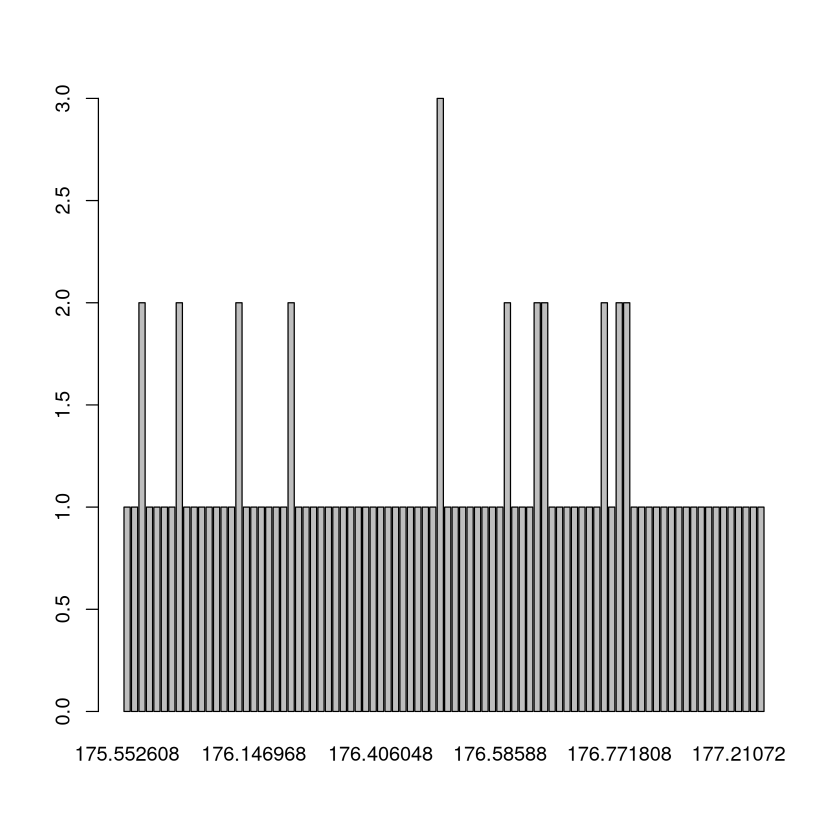

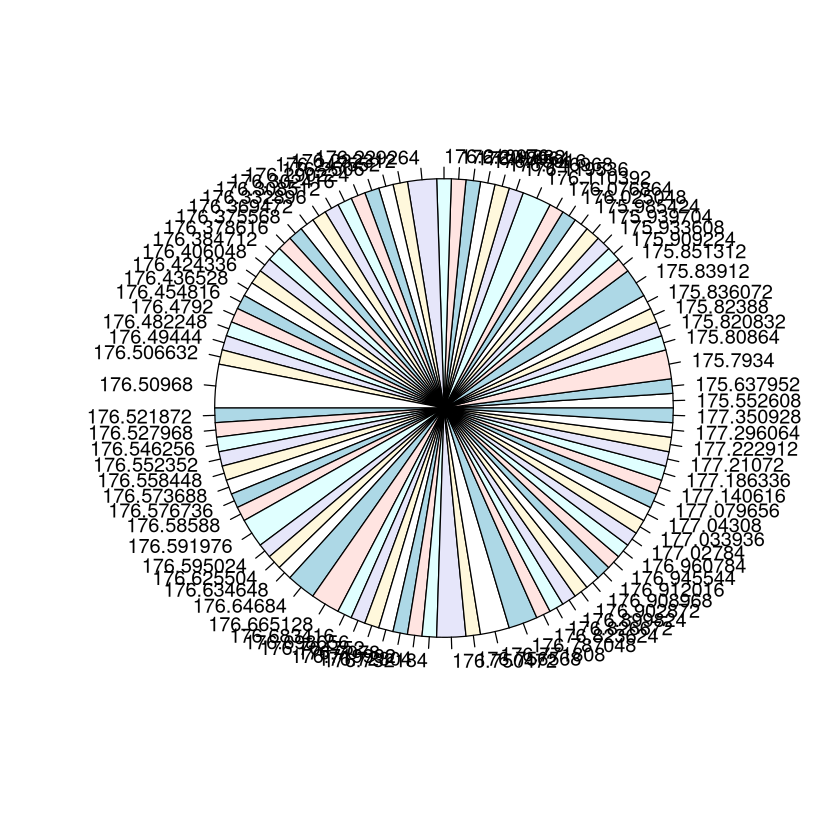

In [8]:
table(pegel)
barplot(table(pegel))
pie(table(pegel))

Grafiken, welche hier trotzdem sehr aussagekräftig sind: Histogramm (mit geeigneten Klassen), Boxplot und empirische Verteilungsfunktion.

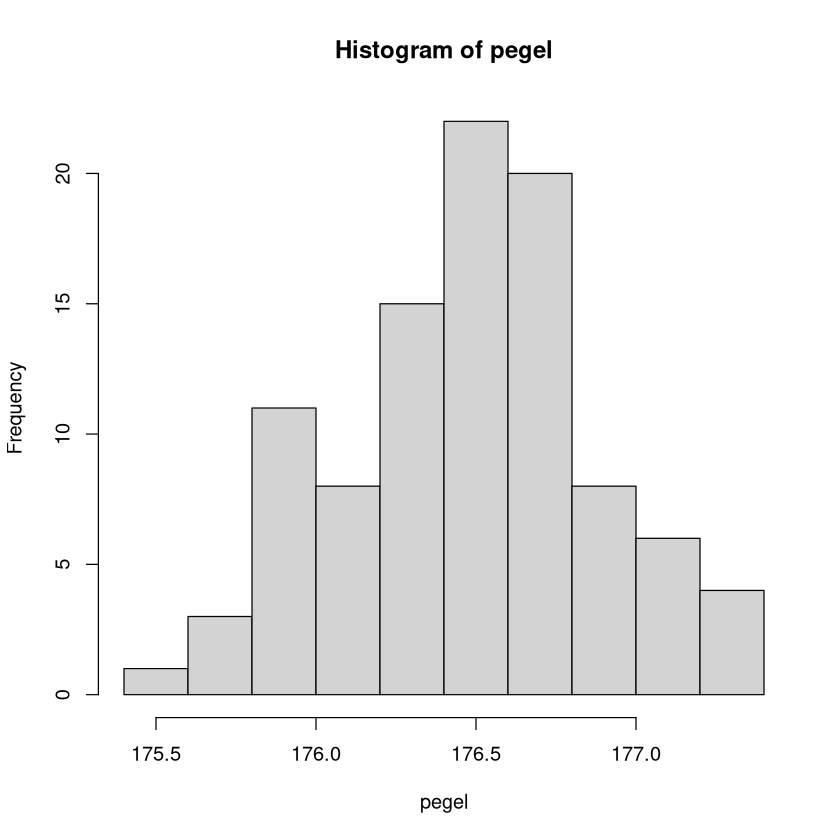

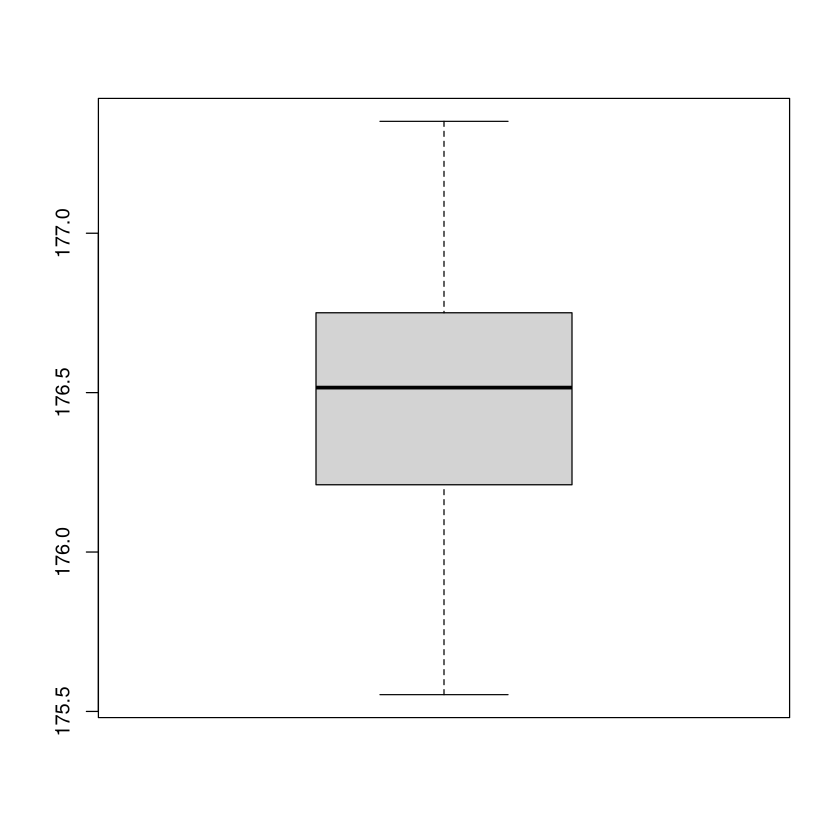

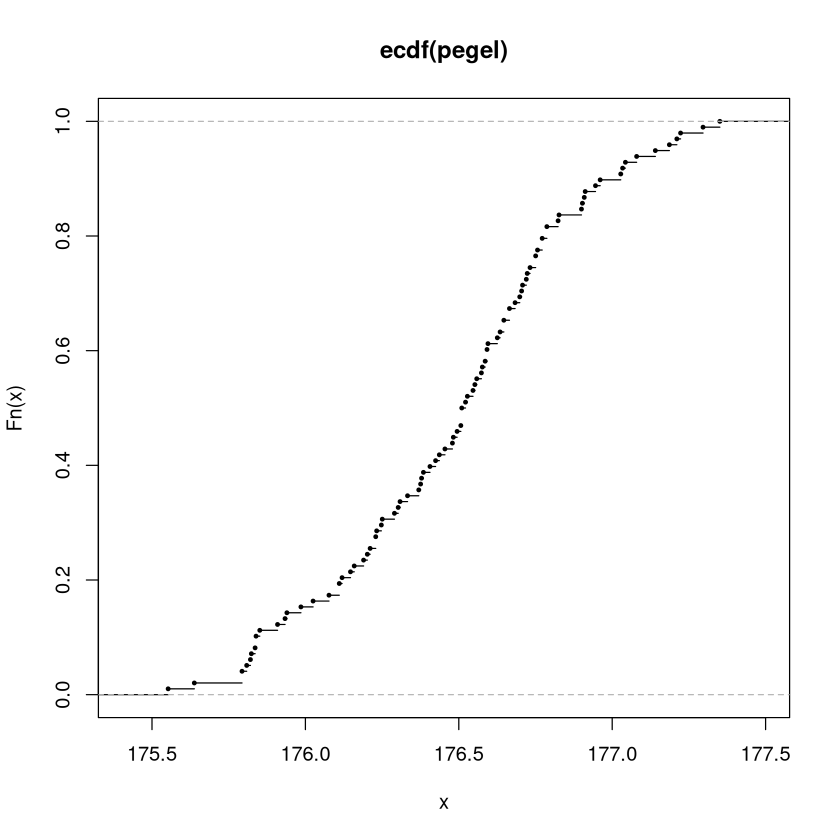

In [9]:
hist(pegel)

boxplot(pegel)

plot(ecdf(pegel),cex=0.4)

Um Kreisdiagramm und Häufigkeitstabelle sinnvoll anwenden zu können müssen wir zuvor klassieren. Hier teilen wir die Daten in 8 Klassen.


(175.6,175.8]   (175.8,176]   (176,176.2] (176.2,176.5] (176.5,176.7] 
            2            13            10            16            25 
(176.7,176.9] (176.9,177.1] (177.1,177.4] 
           17             9             6 

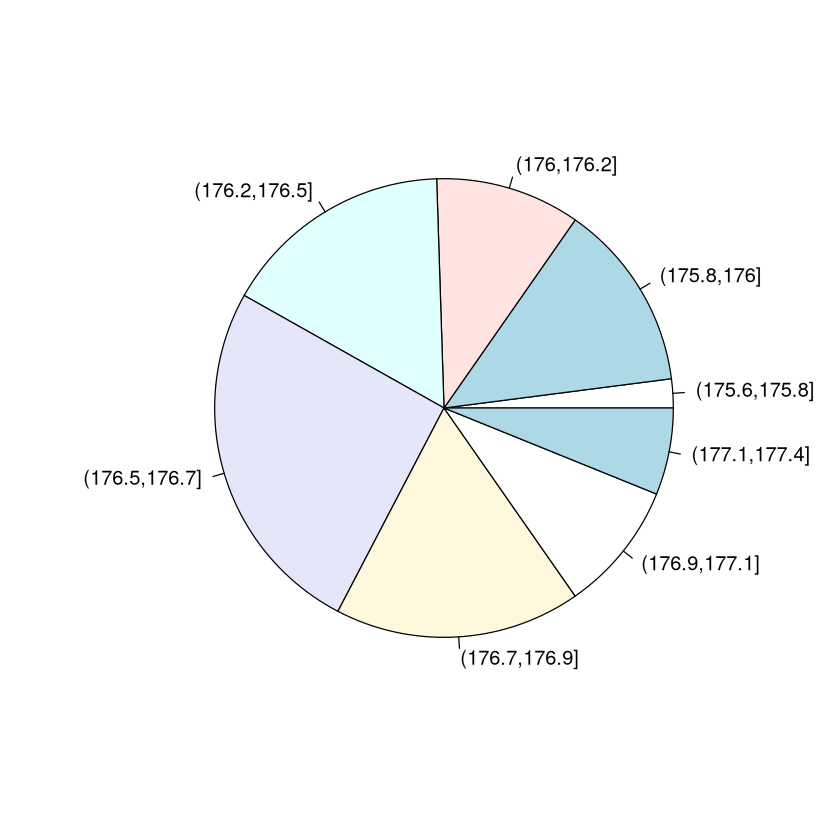

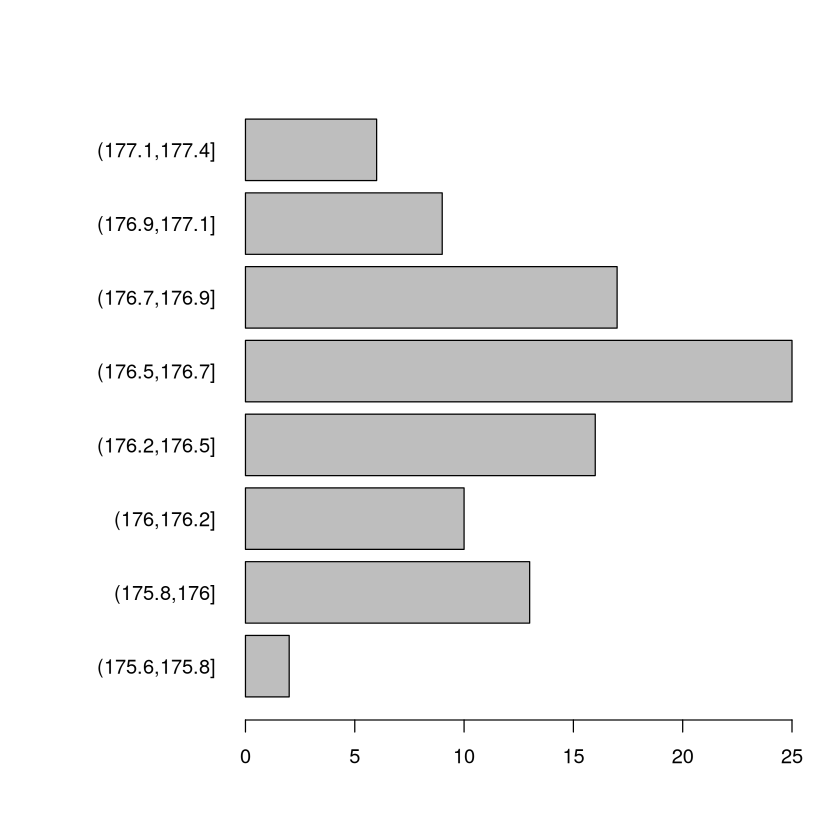

In [20]:
table(cut(pegel,8))                                 # Häufigkeitstabelle der klassierten Daten

pie(table(cut(pegel,8)))                            # Kreisdiagramm der klassierten Daten

par(mar = c(5, 10, 4, 2))                           # Macht den linken Rand größer
                                                    # ohne den Befehlt wird die Beschriftung der y-Achse
                                                    # abgeschnitten
barplot(table(cut(pegel,8)),horiz = TRUE,las = 1)   # Barplot der klassierten Daten


## Zusammenfassung

### Grafiken

- Diskrete Merkmale mit sehr wenigen Ausprägungen (z.B. 3):
  - Häufigkeitstabelle
  - Säulendiagramm der Häufigkeiten
  - Kreisdiagramm
  - empirische Verteilungsfunktion
  
- Diskrete Mermale mit wenigen Ausprägungen (z.B. 10):
  - Häufigkeitstabelle
  - Säulendiagramm der Häufigkeiten
  - Kreisdiagramm der Häufigkeiten
  - empirische Verteilungsfunktion
  - Boxplot
  
- Diskrete Merkmale mit vielen Ausprägungen oder stetige Merkmale
  - Histogramm
  - Boxplot
  - empirische Verteilungsfunktion
  - Klassierung und anschließend (Häufigkeitstabelle mit zugehörigem Balkendiagramm oder Kreisdiagramm)
  
### Maßzahlen

- Die uns bekannten Maßzahlen sind alle für metrische Merkmale berechenbar.
- Bei wenigen Ausprägungen sind Streuungsmaße und Quantile nicht sehr aussagekräftig.